In [1]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
NUM_CLASSES = 10
RESHAPED = 784
HIDDEN_NEURONS = 256
IMG_ROWS = 28
IMG_COLS = 28
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
BATCH_SIZE = 128
EPOCHS = 50
VALIDATION_SPLIT = 0.2

In [3]:
class cnn_fmnist:
    @staticmethod
    def build(input_shape, classes, use_l2_reg=False, l2_loss_lambda=0.00025):
        l2 = regularizers.l2(l2_loss_lambda) if use_l2_reg else None
        if l2 is None: print("Using L2 regularization {}".format(l2_loss_lambda))

        model = Sequential([
            Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape, kernel_regularizer=l2),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2,2)),
            Dropout(0.15),

            Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2,2)),
            Dropout(0.20),

            Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2,2)),
            Dropout(0.30),

            Flatten(),
            Dropout(0.40),

            Dense(1024, activation='relu', kernel_regularizer=l2),
            Dropout(0.40),

            Dense(512, activation='relu', kernel_regularizer=l2),
            Dropout(0.20),

            Dense(NUM_CLASSES, activation='softmax')
        ])
        
        return model

In [4]:
model = cnn_fmnist.build(input_shape=(INPUT_SHAPE), classes=NUM_CLASSES, use_l2_reg=True)
adam = Adam(learning_rate=0.0001)
model.summary()

C:\Users\miguelestradam36\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,804,170 (6.88 MB)

 Trainable params: 1,803,722 (6.88 MB)

 Non-trainable params: 448 (1.75 KB)

In [5]:
fashion_data = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

train_images = train_images.reshape((60000, IMG_ROWS, IMG_COLS, 1))
test_images = test_images.reshape((10000, IMG_ROWS, IMG_COLS, 1))

train_images, test_images = train_images/255.0 , test_images/255.0

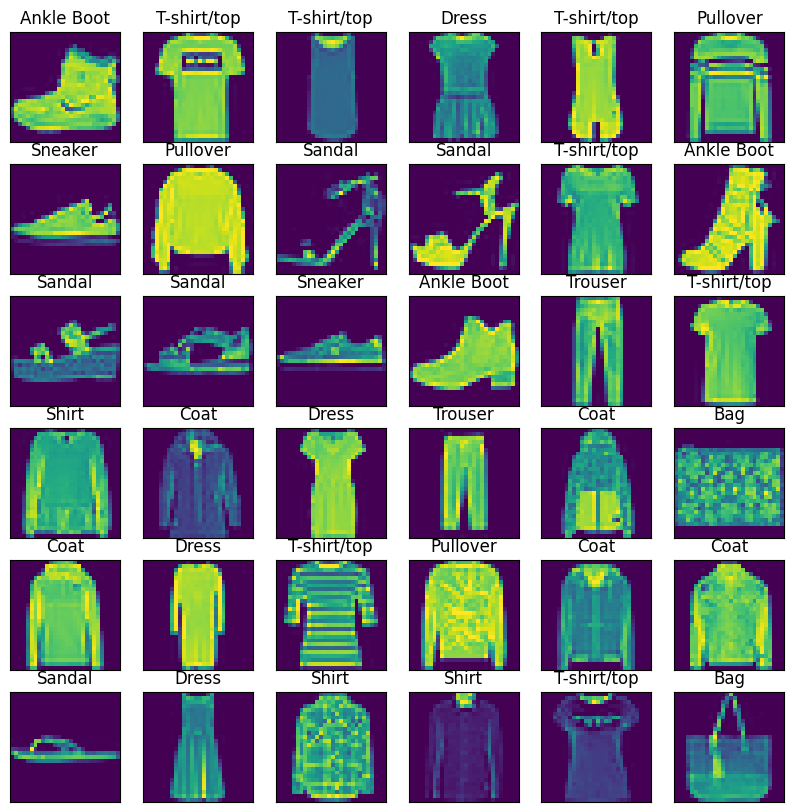

In [6]:
labels = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress',
          4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag',
          9:'Ankle Boot'}

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((IMG_ROWS, IMG_COLS)))
    label_index = train_labels[i]
    plt.title(labels[label_index])
plt.show()

In [7]:

train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [8]:
# Already tried other optimizers
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,804,170 (6.88 MB)

 Trainable params: 1,803,722 (6.88 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
history = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 52s 130ms/step - accuracy: 0.4622 - loss: 2.2753 - val_accuracy: 0.4641 - val_loss: 1.9454
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 132ms/step - accuracy: 0.7118 - loss: 1.2517 - val_accuracy: 0.8030 - val_loss: 1.0028
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 143ms/step - accuracy: 0.7609 - loss: 1.1035 - val_accuracy: 0.8322 - val_loss: 0.9205
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 60s 159ms/step - accuracy: 0.7879 - loss: 1.0317 - val_accuracy: 0.8429 - val_loss: 0.8772
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 150ms/step - accuracy: 0.8087 - loss: 0.9678 - val_accuracy: 0.8497 - val_loss: 0.8485
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 51s 136ms/step - accuracy: 0.8188 - loss: 0.9298 - val_accuracy: 0.8641 - val_loss: 0.8096
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 133ms/step - accuracy: 0.8319 - loss: 0.8841 - val_accuracy: 0.8684 - val_loss: 0.7833
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 133ms/step - accuracy: 0.8376 - loss: 0

In [10]:
score = model.evaluate(test_images, test_labels)
print("Test score: {}".format(score[0]))
print("Test accuracy: {}".format(score[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9253 - loss: 0.3374
Test score: 0.3309141993522644
Test accuracy: 0.9254000186920166


Text(0.5, 1.0, 'Train - Accuracy')

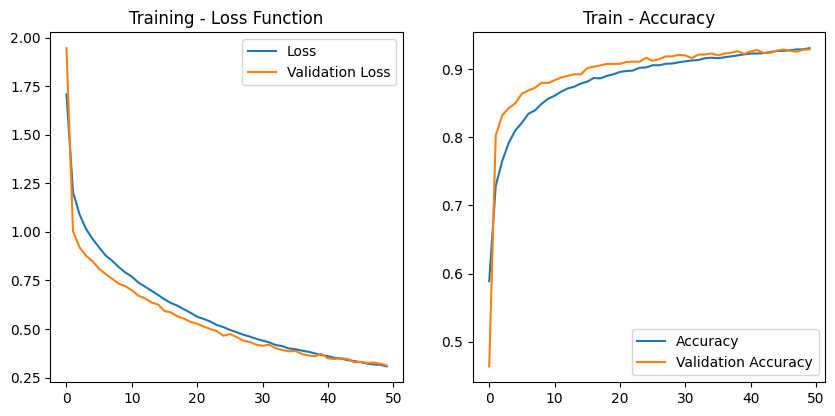

In [11]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [12]:
predicted_classes = np.around(model.predict(test_images))
predicted_classes = np.argmax(predicted_classes, axis=1)

test_labels = np.argmax(test_labels, axis=1)

correct = np.nonzero(predicted_classes == test_labels)[0]
incorrect = np.nonzero(predicted_classes != test_labels)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


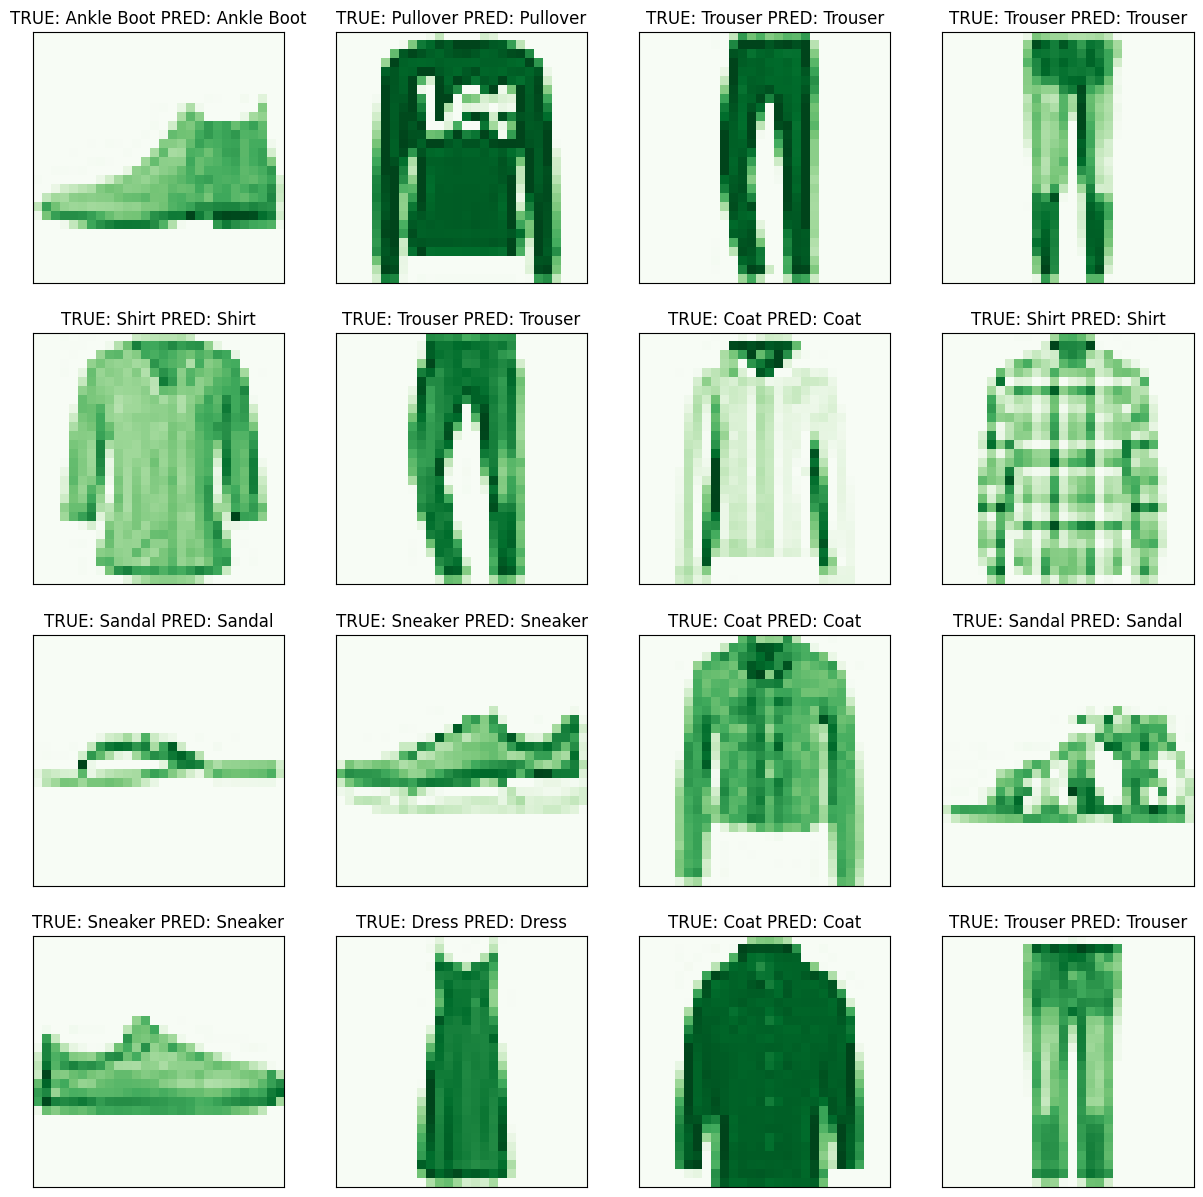

In [13]:
plt.figure(figsize=(15,15))

for i, index in enumerate(correct[:16]):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(test_images[index].reshape((IMG_ROWS, IMG_COLS)), cmap='Greens')
    label_index = test_labels[index]
    plt.title('TRUE: {} PRED: {}'.format(labels[test_labels[index]], labels[predicted_classes[index]]))

plt.show()